# [ PART 03. 통계분석 ] - 2장. T-검정(T-test)

## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계를 위해 사용하는 패키지
from scipy import stats
from statsmodels.stats.diagnostic import kstest_normal  # 정규성 검정 (Kolmogorov-Smirnov normality test)

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sb

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

## T-test 의 단계

(0-1) 정규성 검정  
(0-2) 등분산 검정 (독립표본 T-test 일 경우)  
.  
(1) 가설 설정  
(2) 유의수준 설정  
(3) 검정통계량의 값 및 유의확률 계산  
(4) 귀무가설의 기각여부 판단 및 의사결정

## 1. 단일표본 T-검정 (One Sample T-Test)

- 단일 모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교하고자 할 때 사용하는 검정방법

In [2]:
# 데이터프레임 생성
df_cats = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/cats.csv',
                       index_col = 'Unnamed: 0')

df_cats

,Sex,Bwt,Hwt
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
...,...,...,...
140,M,3.7,11.0
141,M,3.8,14.8
142,M,3.8,16.8
143,M,3.9,14.4


### 1.1. 정규성 검정
< 가설 설정 - 정규성 검정 >
- 귀무가설(H0) : 데이터가 정규분포를 따른다.
- 대립가설(H1) : 데이터가 정규분포를 따르지 않는다.

< 유의수준은 0.05 로 설정 >

#### 1.1.1. Shapiro-Wilk normality test

In [3]:
# 고양이의 몸무게 데이터에 대한 정규성 검정 수행

# scipy.stats.shapiro( x )

result = stats.shapiro( df_cats['Bwt'] )

print( f' Statistics: {result[0]:.4f} \n P-value: {result[1]:.28f}' )

if result[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if result[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

 Statistics: 0.9519 
 P-value: 0.0000673024842399172484874725
 p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.



#### 1.1.2. Kolmogorov-Smirnov normality test

In [4]:
# statsmodels.stats.diagnostic.kstest_normal( x,
#                                             dist = 'norm',    # 가정된 분포
#                                             pvalmethod = 'table')  # 검정 통계량의 p-값을 계산하는데 사용되는 방법

result = kstest_normal(df_cats['Bwt'])
print( f' Statistics: {result[0]:.4f} \n P-value: {result[1]:.28f}' )

if result[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if result[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

 Statistics: 0.1017 
 P-value: 0.0022497993974595915239733657
 p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.



#### 1.1.3. Q-Q plot

### 1.2. 단일표본 T-검정
< 가설 설정 - T-검정 >
- 귀무가설(H0) : 고양이들의 평균 몸무게는 2.6 (kg)이다.
- 대립가설(H1) : 고양이들의 평균 몸무게는 2.6 (kg)이 아니다.

< 유의수준은 0.05 로 설정 >

#### 1.2.1. 표본이 정규분포를 따르지 않을 경우: Wilcoxon test

In [6]:
# 표본이 정규분포를 따르지 않으므로 1-sample wilcoxon test 수행

# scipy.stats.wilcoxon( x,  # 첫 번째 측정 집합. 1차원이어야 한다.
#                           # 1-sample wilcoxon test일 경우 'x - 예상치' 입력
#                       y = None,  # 두번째 측정값 집합. 1차원이어야 한다. 기본값은 None
#                       zero_method = 'wilcox',  # 기본값은 'wilcox'
#                                                # " Wilcox ": 기본값인 모든 0차를 버립니다.
#                                                # "pratt": 순위 결정 과정에서 0차를 포함하지만 0의 순위를 떨어뜨립니다.
#                                                # "zsplit": 순위 프로세스에 0차를 포함하고 0 순위를 양수와 음수 사이에 나눕니다.
#                       correction = False,  # 기본값은 False.
#                                            # True 로 설정하면, 정규 근사가 사용되는 경우 z-통계량을 계산할 때 
#                                             평균값을 향해 Wilcoxon 순위 통계량을 0.5 조정하여 연속성 수정을 적용한다.
#                       alternative = 'two-sided',  # 양측/단측 검정 설정. 기본값은 ‘two-sided’
#                                                   # 양측검정은 ‘two-sided’
#                                                   # 단측검정은 ‘less’ 또는 ‘greater’
#                       mode = 'auto' )  # p-값을 계산하는 데 사용되는 분포를 정의. 기본값은 'auto'
#                                        # 'auto' : 옵션들 중 하나를 선택
#                                        # 'exact' : 검정 통계량의 정확한 분포를 사용
#                                        # 'approx' : 단측 확률의 두 배인 양측 확률을 근사
#                                        # 'asymp': 검정 통계량의 점근 분포를 사용

wilcoxon_cats = stats.wilcoxon( df_cats['Bwt'] - 2.6 )

print( f' V-value(1-sample Wilcoxon result): {wilcoxon_cats[0]:.4f} \n P-value: {wilcoxon_cats[1]:.28f}' )

if wilcoxon_cats[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 고양이들의 평균 몸무게는 2.6 (kg)이 아니다.")
if wilcoxon_cats[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 고양이들의 평균 몸무게는 2.6 (kg)이다.")
print()

 V-value(1-sample Wilcoxon result): 3573.0000 
 P-value: 0.0252452029481409316591378200
 p-value < 0.05 이므로 귀무가설 기각. 고양이들의 평균 몸무게는 2.6 (kg)이 아니다.



#### 1.2.2. 표본이 정규분포를 따를 경우: T-test

In [7]:
# 단일 표본 t-test 실시

## 독립 관측치 a 표본의 기대값(평균)이 주어진 모집단 평균 popmean 과 같다는 귀무 가설에 대한 검정

# scipy.stats.ttest_1samp( a,  # 검정을 수행할 대상 (배열)
#                          popmean,  # 귀무가설의 기대값.
#                          axis = 0,  # a 배열에서 검정을 수행할 축 지정. 기본값은 0
#                                     # axis = None 이면 전체 배열을 계산
#                          nan_policy = 'propagate',  # 입력된 데이터에 NaN 값이 포함된 경우의 처리 방법. 기본값은 ‘propagate’
#                                                     # ‘propagate’ : NaN 을 반환한다.
#                                                     # ‘raise’: 에러를 발생시킨다.
#                                                     # ‘omit’: NaN 값을 무시하고 계산 수행
#                          Alternative = 'two-sided' )  # 양측/단측 검정 설정. 기본값은 ‘two-sided’
#                                                       # 양측검정은 ‘two-sided’
#                                                       # 단측검정은 ‘less’ 또는 ‘greater’


one_t_cats = stats.ttest_1samp( df_cats['Bwt'], 2.6 )

print( f' Statistic(T_value): {one_t_cats[0]:.4f} \n P-value: {one_t_cats[1]:.28f}' )

if one_t_cats[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 고양이들의 평균 몸무게는 2.6 (kg)이 아니다.")
if one_t_cats[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 고양이들의 평균 몸무게는 2.6 (kg)이다.")
print()

 Statistic(T_value): 3.0565 
 P-value: 0.0026730362561723612635500302
 p-value < 0.05 이므로 귀무가설 기각. 고양이들의 평균 몸무게는 2.6 (kg)이 아니다.



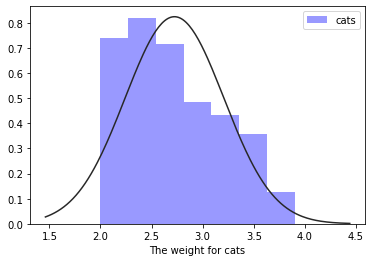

In [8]:
# kde(Kerner Density Estimation): 구해진 히스토그램을 정규화한 뒤 확률밀도함수로 사용

ax = sb.distplot( df_cats['Bwt'],
                  kde = False,    # 가우스 커널 밀도 추정값을 그릴지 여부
                  fit = stats.norm,    # 랜덤 변수 객체
                  label = "cats",
                  color = 'blue')

ax.set(xlabel = "The weight for cats")

plt.legend()
plt.show()

## 2. 대응표본 T-검정 (Paired Sample T-Test)
- 단일 모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 따른 평균의 차이를 비교하고자 할 때 사용하는 검정방법
- 하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 표본 내의 개체들에 대해서 두 번의 측정을 실시
- 관측값들은 서로 독립적이지 않고 쌍으로 이루어져 있다.

In [9]:
# 데이터를 array 로 생성

before = np.array( [7, 3, 4, 5, 2, 1, 6, 6, 5, 4] )
after = np.array( [8, 4, 5, 6, 2, 3, 6, 8, 6, 5] )

### 2.1. 정규성 검정
< 가설 설정 - 정규성 검정 >
- 귀무가설(H0) : 데이터가 정규분포를 따른다.
- 대립가설(H1) : 데이터가 정규분포를 따르지 않는다.

< 유의수준은 0.05 로 설정 >

In [10]:
# 복용 전, 복용 후 수면시간 데이터들에 대해 정규성 검정 수행

shapiro_before = stats.shapiro( before )
shapiro_after = stats.shapiro( after )

print( f' <before> W-Value: {shapiro_before[0]:.4f} \n <before> P-value: {shapiro_before[1]:.28f}' )
print( f' <after> W-Value: {shapiro_after[0]:.4f} \n <after> P-value: {shapiro_after[1]:.28f}' )

 <before> W-Value: 0.9645 
 <before> P-value: 0.8352694511413574218750000000
 <after> W-Value: 0.9457 
 <after> P-value: 0.6177982091903686523437500000


- Shapiro-Wilk normality test 결과, 복용 전/후의 데이터 모두 P값이 유의수준 0.05 보다 크므로 귀무가설을 채택한다.
- 즉, 데이터가 정규분포를 따른다.

### 2.2. 대응표본 T-검정
< 가설 설정 - T-검정 >
- 귀무가설(H0) : ( 복용 후 평균수면시간 - 복용 전 평균 수면시간 ) = 0
- 대립가설(H1) : ( 복용 후 평균수면시간 - 복용 전 평균 수면시간 ) > 0   --> 우단측검정에 해당

< 유의수준은 0.05 로 설정 >

In [11]:
# 대응표본 T-검정 수행

# scipy.stats.ttest_rel( a, b,    # a, b 두 배열은 shape 이 같아야 한다.
#                        axis = 0,  # a 배열에서 검정을 수행할 축 지정. 기본값은 0
#                                   # axis = None 이면 전체 배열을 계산
#                        nan_policy = 'propagate',  # 입력된 데이터에 NaN 값이 포함된 경우의 처리 방법. 기본값은 ‘propagate’
#                                                   # ‘propagate’ : NaN 을 반환한다.
#                                                   # ‘raise’: 에러를 발생시킨다.
#                                                   # ‘omit’: NaN 값을 무시하고 계산 수행
#                        Alternative = 'two-sided' )  # 양측/단측 검정 설정. 기본값은 ‘two-sided’
#                                                     # 양측검정은 ‘two-sided’
#                                                     # 단측검정은 ‘less’ 또는 ‘greater’


# 단측 검정으로 대응표본 t-test 시행
paired_t_test = stats.ttest_rel( after, before,
                                 alternative = 'greater')

print( f' Statistic(T-value): {paired_t_test[0]:.3f} \n P-value: {paired_t_test[1]:.28f} ')

 Statistic(T-value): 4.743 
 P-value: 0.0005269356285082764249430576 


In [12]:
# 평균
diff_result = before - after
print( diff_result.mean() )
print()

-1.0



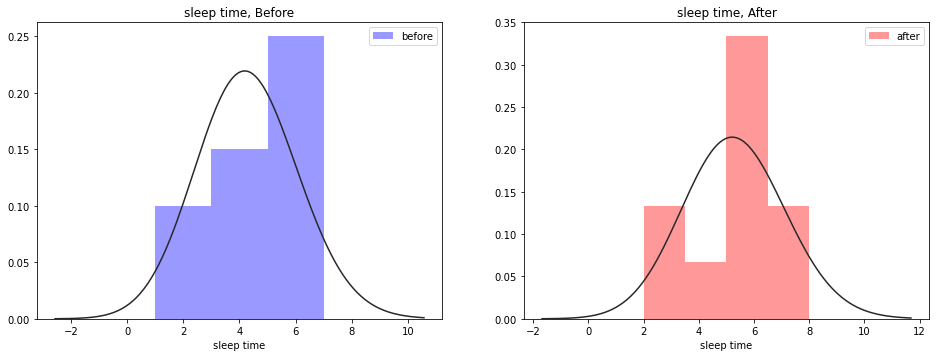

In [13]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(221)
ax1 = sb.distplot(before, kde=False, fit=stats.gamma, label="before", color = 'blue')
ax1.set(xlabel = "sleep time", title = "sleep time, Before")
plt.legend()

ax2 = plt.subplot(222)
ax2 = sb.distplot(after, kde=False, fit=stats.gamma, label="after", color = 'red')
ax2.set(xlabel = "sleep time", title = "sleep time, After")

plt.legend()
plt.show()

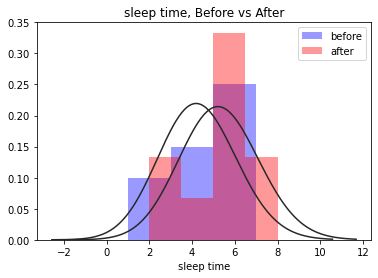

In [14]:
ax3 = plt.subplots()
ax3 = sb.distplot(before, kde=False, fit=stats.gamma, label="before",color = 'blue')
ax3 = sb.distplot(after, kde=False, fit=stats.gamma, label="after", color = 'red')
ax3.set(xlabel = "sleep time", title = "sleep time, Before vs After")

plt.legend()
plt.show()

## 3. 독립표본 T-검정 (Independent Sample T-Test)
- 두 개의 독립된 모집단의 평균을 비교하고자 할 때 사용하는 검정방법

In [15]:
df_cats = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/cats.csv',
                       index_col = 'Unnamed: 0')

df_cats

,Sex,Bwt,Hwt
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
...,...,...,...
140,M,3.7,11.0
141,M,3.8,14.8
142,M,3.8,16.8
143,M,3.9,14.4


In [16]:
# 두 개의 독립 표본 생성

cats_bwt_m = df_cats[ df_cats['Sex'] == 'M' ]['Bwt']

cats_bwt_f = df_cats[ df_cats['Sex'] == 'F' ]['Bwt']

print('< cats_Bwt_M >')
display( cats_bwt_m.head() )
print()
display( cats_bwt_m.describe() )
print('\n')
print('< cats_Bwt_F >')
display( cats_bwt_f.head() )
print()
display( cats_bwt_f.describe() )

< cats_Bwt_M >


48    2.0
49    2.0
50    2.1
51    2.2
52    2.2
Name: Bwt, dtype: float64

count    97.000000
mean      2.900000
std       0.467484
min       2.000000
25%       2.500000
50%       2.900000
75%       3.200000
max       3.900000
Name: Bwt, dtype: float64



< cats_Bwt_F >


1    2.0
2    2.0
3    2.0
4    2.1
5    2.1
Name: Bwt, dtype: float64

count    47.000000
mean      2.359574
std       0.273988
min       2.000000
25%       2.150000
50%       2.300000
75%       2.500000
max       3.000000
Name: Bwt, dtype: float64

### 3.1. 정규성 검정
< 가설 설정 - 정규성 검정 >
- 귀무가설(H0) : 데이터가 정규분포를 따른다.
- 대립가설(H1) : 데이터가 정규분포를 따르지 않는다.

< 유의수준은 0.05 로 설정 >

In [17]:
# 고양이의 몸무게 데이터에 대한 정규성 검정 수행

shapiro_cats_bwt_m = stats.shapiro( cats_bwt_m )
shapiro_cats_bwt_f = stats.shapiro( cats_bwt_f )

print('shapiro_cats_bwt_m')
print( f' W-Value: {shapiro_cats_bwt_m[0]:.4f} \n P-value: {shapiro_cats_bwt_m[1]:.28f}' )
if shapiro_cats_bwt_m[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if shapiro_cats_bwt_m[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

print('shapiro_cats_bwt_f')
print( f' W-Value: {shapiro_cats_bwt_f[0]:.4f} \n P-value: {shapiro_cats_bwt_f[1]:.28f}' )
if shapiro_cats_bwt_f[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.")
if shapiro_cats_bwt_f[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.")
print()

shapiro_cats_bwt_m
 W-Value: 0.9788 
 P-value: 0.1189574524760246276855468750
 p-value > 0.05 이므로 귀무가설 채택. 데이터가 정규분포를 따른다.

shapiro_cats_bwt_f
 W-Value: 0.8910 
 P-value: 0.0003754299250431358814239502
 p-value < 0.05 이므로 귀무가설 기각. 데이터가 정규분포를 따르지 않는다.



### 3.2. 등분산 검정
< 가설 설정 - 등분산성 검정 >
- 귀무가설(H0) : 두 집단의 분산이 동일하다.
- 대립가설(H1) : 두 집단의 분산이 동일하지 않다.

< 유의수준은 0.05 로 설정 >

#### 3.2.1. Bartlett's Test

In [18]:
# scipy.stats.bartlett( sample1, sample2,… )

bartlett_test = stats.bartlett( cats_bwt_m, cats_bwt_f )

print( f" Statistic(Bartlett's test): {bartlett_test[0]:.3f} \n P-value: {bartlett_test[1]:.12f} " )

if bartlett_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.")
if bartlett_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.")
print()

 Statistic(Bartlett's test): 15.075 
 P-value: 0.000103338941 
 p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.



#### 3.2.2. Levene's Test

In [19]:
# scipy.stats.levene( sample1, sample2,…,
#                     center = 'median',    # 검정에 사용할 통계값의 종류. 'mean’, ‘median’, ‘trimmed’
#                                           # 기본값은 ‘median’.
#                     proportiontocut = 0.05 )    # center 옵션에 ‘trimmed’ 을 지정할 경우. 데이터의 각 끝으로부터 잘라내는 지점의 비율을 지정.
#                                                 # 기본값은 0.05.

levene_test = stats.levene( cats_bwt_m, cats_bwt_f )

print( f" Statistic(Levene's Test): {levene_test[0]:.3f} \n P-value: {levene_test[1]:.12f} " )

if levene_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.")
if levene_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.")
print()

 Statistic(Levene's Test): 19.431 
 P-value: 0.000020435285 
 p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.



#### 3.2.3. Fligner’s Test

In [20]:
# scipy.stats.fligner( sample1, sample2,…,
#                      center = 'median',    # 검정에 사용할 통계값의 종류. 'mean’, ‘median’, ‘trimmed’
#                                            # 기본값은 ‘median’.
#                      proportiontocut = 0.05 )    # center 옵션에 ‘trimmed’ 을 지정할 경우. 데이터의 각 끝으로부터 잘라내는 지점의 비율을 지정.
#                                                  # 기본값은 0.05.

fligner_test = stats.fligner( cats_bwt_m, cats_bwt_f )

print( f" Statistic(Fligner’s Test): {fligner_test[0]:.3f} \n P-value: {fligner_test[1]:.12f} " )

if fligner_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.")
if fligner_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.")
print()

 Statistic(Fligner’s Test): 16.909 
 P-value: 0.000039210381 
 p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.



### 3.3. 독립표본 T-검정
< 가설 설정 - T-검정 >
- 귀무가설(H0) : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 없다.
- 대립가설(H1) : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 있다.

< 유의수준은 0.05 로 설정 >

In [21]:
# 독립 표본 t 검정, equal_var = True 분산차이는 없다
indepen_t_test = stats.ttest_ind( cats_bwt_m, cats_bwt_f,
                                  alternative = 'two-sided',
                                  equal_var = False )

print( f' Statistic(t-Value): {indepen_t_test[0]:.3f} \n P-value: {indepen_t_test[1]:.20f}' )

if indepen_t_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. \n 두 집단 사이에는 통계적으로 유의한 차이가 있다.")
if indepen_t_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. \n 두 집단 사이에는 통계적으로 유의한 차이가 없다.")
print()

 Statistic(t-Value): 8.709 
 P-value: 0.00000000000000883103
 p-value < 0.05 이므로 귀무가설 기각. 
 두 집단 사이에는 통계적으로 유의한 차이가 있다.

